# scikit-learn을 이용한 데이터 분석

#### 초록
***
<span style="font-size:11pt; line-height:1.8;">
    &nbsp; &nbsp; scikit-learn 머신러닝 툴을 활용하여 해당 라이브러리에서 제공되는 데이터셋인  '숫자 이미지 분류', '와인 등급 분류', '유방암 진단'을 바탕으로 여러 모델을 학습, 평가한다. 모델은 '의사결정트리', '랜덤포레스트', 'SVM', 'SGD', '로지스틱회귀'을 활용하였다. 분석, 평가 단계는 '데이터셋 특성 파악', '데이터 정규화', '모델 학습', '모델 평가 및 평가지표 선택' 순으로 진행하였다. 평가 결과, '숫자 이미지 분류 데이터셋'은 고른 데이터 분포의 특성을 가지고 있으며 클래스 별 중요도가 동일하여 Accuracy를 평가지표로 선택하였다. SVM 모델에서 0.96의 정확도를 보여주었다. '와인 등급 분류' 데이터셋은 13개의 변수와 세 가지의 와인 종류로 구성되어있으며, 클래스 간 데이터 분포가 균등하지 않아 Accuracy와 f1-score를 평가지표로 채택하였다. '랜덤 포레스트', '서포트 벡터 머신', '로지스틱 회귀'모델에서 Accuracy와 f1-score모두 1.0으로 높은 정확도와 F값을 보여주었다. '유방암 진단' 데이터셋은 30개의 변수와 '양성'과 '음성' 클래스로 구성되어있으며, '양성'과 '음성' 데이터 분포가 균등하지 않고 클래스 간 중요도가 달라 Precision을 평가지표로 채택하였다. '랜덤 포레스트' 모델에서 Precision이 1.0으로 높은 적합률을 보여주었다.
</span>

***

### 1. 분석, 평가 방법

***
<span style="font-size:12pt; line-height:1.6; font-family:Serif;">
    &nbsp; &nbsp; scikit-learn 머신러닝 툴을 이용하여, '숫자 이미지 분류', '와인 종류 분류', '유방암 진단', 세 데이터셋을 분석하고 모델을 학습하여 평가하고자 한다. 각 데이터셋을 분석, 평가하기 위해 '데이터셋 특성 파악', '데이터 정규화', 'scikit-learn 제공 모델 학습', '모델 평가' 순으로 진행한다.
</span><br><br>


> <b>분석 및 평가 절차</b>
> 1. 데이터셋 특성 파악
>
>
> 2. 데이터 정규화
>
>
> 3. 모델 학습
>
>
> 4. 모델 평가(평가지표 선택)

***

#### 패키지 및 클래스 호출
***
+ fit, predict, evaluate 등 반복적으로 사용되는 부분을 최소화 하기위해 자체적으로 클래스를 생성하여 사용한다.
***

In [1]:
import matplotlib.pyplot as plt   #그래프 및 이미지 시각화
import seaborn as sns   #그래프 및 이미지 시각화
import pandas as pd   #데이터 프레임 관리
import numpy as np   #배열 및 행렬 관리

from sklearn.model_selection import train_test_split   #split train, test data
from sklearn.metrics import classification_report   #테스트 지표 출력

#load_dataset================================
from sklearn.datasets import load_digits   #숫자 이미지 분류
from sklearn.datasets import load_wine   #와인
from sklearn.datasets import load_breast_cancer   #유방암 여부
#End=========================================

In [2]:
class UniModel:
    def __init__(self, dataset):
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(   #데이터 분할
            dataset.data,
            dataset.target, 
            test_size=0.2, 
            random_state=7
        )
        
    def _get_model(self, model_type):   #모델 호출함수
        if model_type == "DTC":
            from sklearn.tree import DecisionTreeClassifier   #의사결정트리
            return DecisionTreeClassifier(random_state=32)
        elif model_type == "RFC":
            from sklearn.ensemble import RandomForestClassifier   #랜덤포레스트
            return RandomForestClassifier(random_state=32)
        elif model_type == "SVM":
            from sklearn import svm  #서포트벡터머신
            return svm.SVC()
        elif model_type == "SGD":
            from sklearn.linear_model import SGDClassifier   #확률적 경사하강법
            return SGDClassifier()
        from sklearn.linear_model import LogisticRegression   #로지스틱 회귀
        return LogisticRegression(max_iter=10000)
    
    
    def get_model_predict(self, model_type):
        model = self._get_model(model_type)   #모델 선택
        model.fit(self.x_train, self.y_train)   #모델 학습
        test_pred = model.predict(self.x_test)   #test데이터에 대한 예측
        return [self.y_test, test_pred]

#### UniModel 클래스 사용 예시
***

`uni_model = UniModel(DATASET)`

+ 인스턴스 생성, 매개변수로 데이터셋을 넣어준다.

<br></br>

`y_test, predict_test = uni_model.get_model_predict(MODEL_TYPE)`

+ get_model_predict 메소드를 사용하여 모델의 학습, 예측이 시행된다.
+ 매개변수로는 알고리즘의 약어를 입력한다. ex) "서포트 벡터 머신: SVM"
+ 반환값으로 테스트 데이터에 대한 모델의 예측값인 'predict_test'와 정답 값인 'y_test'를 반환한다.

***

### 2. 숫자 이미지 분류

#### 2.1 데이터셋 특성 파악
***
<span style="font-size:12pt; line-height:1.6; font-family:Serif;">
    &nbsp; &nbsp; 데이터는 총 1,791개로 feature의 개수는 64개이다. 이미지 데이터로 8 * 8 * 1(gray)size이다. 정답 클래스는 숫자 0 ~ 9에 해당하며 총 10개이다. 특이하게 데이터의 최대값(max)은 16이다. 각 픽셀값은 0 ~ 16의 정수에 해당한다. 픽셀의 평균 값은 약 4.88이다. [DIGITS DATASET SAMPLE]은 데이터 샘플의 이미지를 시각화 한 것이다.
</span><br><br>

<span style="font-size:12pt; line-height:1.6; font-family:Serif;">
    &nbsp; &nbsp; target별 학습 데이터의 분포를 알아보는 것 또한 중요하다. 데이터가 특정 target을 중심으로 분포되어있다면, 모델이 올바르게 학습하지 못할 수 있기 때문이다. 특히, 데이터 분포가 다를 시에는 Acuuracy 뿐만 아닌, 다른 지표도 참고해야함을 인지할 필요가 있다. [DIGITS DATASET Histogram]은 target별 학습 데이터의 분포를 보여준다. 이를 통해 target별로 데이터가 올바르게 분포하고 있음을 확인할 수 있다.
</span>

***

#### 2.1.1 데이터셋 기본 정보

In [3]:
dataset = load_digits()   #데이터셋 불러오기

#Data_info===========================================
print("Data_Info", "*" * 60)
print("dataset shape: ", dataset.data.shape)
print("feature: ", dataset.feature_names[0:3], "...", dataset.feature_names[-3:]) #feature에 대한 정보
print("target_shape: ", )
print("target: ", np.unique(dataset.target))

print("\nmax data: ", (max(dataset.data.reshape(-1))))
print("min data: ", (min(dataset.data.reshape(-1))))
print("avg: ", dataset.data.mean())
print("End_Info", "*" * 61)
#End==================================================

Data_Info ************************************************************
dataset shape:  (1797, 64)
feature:  ['pixel_0_0', 'pixel_0_1', 'pixel_0_2'] ... ['pixel_7_5', 'pixel_7_6', 'pixel_7_7']
target:  [0 1 2 3 4 5 6 7 8 9]

max data:  16.0
min data:  0.0
avg:  4.884164579855314
End_Info *************************************************************


#### 2.1.2 데이터셋 샘플 시각화
***
+ 해당 데이터는 값이 0에서 15사이에 분포하고 있음을 확인할 수 있다.
***

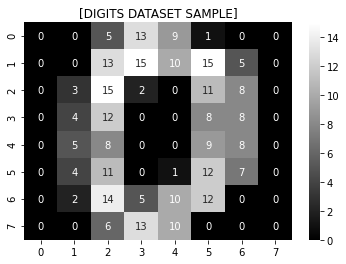

In [4]:
#이미지 데이터 시각화=================================
plt.title("[DIGITS DATASET SAMPLE]")
sns.heatmap(dataset.data[0].reshape(8, 8), annot=True, cmap="gray")
plt.show()
#End==================================================

#### 2.1.3 데이터 히스토그램
***
+ 각 클래스별로 데이터가 고르게 분포되어 있는 것을 확인할 수 있다.
***

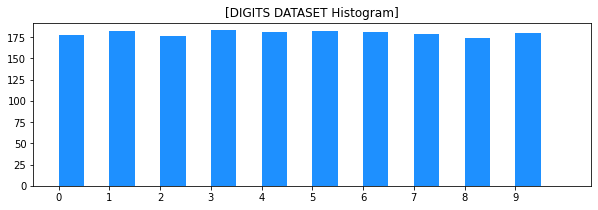

In [5]:
#target 데이터 수에 대한 히스토그램===================
plt.figure(figsize=(10, 3))
plt.title("[DIGITS DATASET Histogram]")
plt.xticks(range(0, 10))
plt.hist(dataset.target, range(0, 11), color="#1e90ff", width=0.5)
plt.show()
#End==================================================

#### 2. 2 데이터 정규화
***
+ 모델 학습 이전, 데이터를 정규화하여 학습 효율을 높이고자 한다. Min-Max 정규화를 이용한다.
***

In [6]:
dataset.data = dataset.data / 16.   #min=0이므로 max만 나누어 준다.

print("Data_Info", "*" * 60)
print("max data: ", (max(dataset.data.reshape(-1))))
print("min data: ", (min(dataset.data.reshape(-1))))
print("End_Info", "*" * 61)

Data_Info ************************************************************
max data:  1.0
min data:  0.0
End_Info *************************************************************


#### 2.3 모델별 학습 및 예측

In [8]:
uni_model = UniModel(dataset)   #인스턴스 생성, 초기화

#### 2.3.1 의사결정트리(Decision Tree Classifier)

In [9]:
y_test, y_pred = uni_model.get_model_predict("DTC")
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360



#### 2.3.2 랜덤포레스트(Random Forest Classifier)

In [10]:
y_test, y_pred = uni_model.get_model_predict("RFC")
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.93      1.00      0.97        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       0.93      1.00      0.96        37
           5       0.90      0.96      0.93        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       1.00      0.84      0.91        43
           9       0.94      0.94      0.94        32

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360



#### 2.3.3 서포트 벡터 머신(Support Vector Machine, SVM)

In [11]:
y_test, y_pred = uni_model.get_model_predict("SVM")
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.98        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        37
           5       0.93      1.00      0.97        28
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        33
           8       1.00      0.93      0.96        43
           9       1.00      0.97      0.98        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



#### 2.3.4 확률적 경사 하강법(Stochastic Gradient Descent, SGD)

In [12]:
y_test, y_pred = uni_model.get_model_predict("SGD")
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        43
           1       0.93      0.90      0.92        42
           2       0.98      1.00      0.99        40
           3       0.92      0.97      0.94        34
           4       0.97      0.97      0.97        37
           5       0.90      0.96      0.93        28
           6       0.93      0.96      0.95        28
           7       0.89      0.97      0.93        33
           8       1.00      0.74      0.85        43
           9       0.88      0.94      0.91        32

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360



#### 2.3.5 로지스틱 회귀(Logistic Regression)

In [13]:
y_test, y_pred = uni_model.get_model_predict("LG")
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.91      0.93      0.92        42
           2       0.95      1.00      0.98        40
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        37
           5       0.90      1.00      0.95        28
           6       1.00      0.93      0.96        28
           7       0.97      1.00      0.99        33
           8       0.95      0.86      0.90        43
           9       0.94      0.91      0.92        32

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



#### 2.4 평가지표 선택
***
<span style="font-size:12pt; line-height:1.6; font-family:Serif;">
    &nbsp; &nbsp; 본 데이터셋에서는 각 모델을 평가하기 위해 <b>Accuracy</b>를 평가지표로 삼는다. Accuracy를 평가지표로 채택한 이유는, 데이터셋의 정답 클래스별 분포가 매우 균일하기 때문이다. 클래스별 분포가 균일할 경우, 정확도가 한 쪽으로 치우칠 우려가 없다. 또한, 클래스별 중요도가 동일하다. 0에서 9까지의 모든 숫자는 어느 하나가 더 중요하거나 하지 않다. 따라서 이러한 근거를 바탕으로 Accuracy를 모델의 평가지표로 채택하였다.
</span><br><br>

<span style="font-size:12pt; line-height:1.6; font-family:Serif;">
    &nbsp; &nbsp; Accuracy를 평가지표로 삼았을 때, 성능이 가장 좋은 모델은 '서포트 벡터 머신'이다. 해당 모델의 Accuracy는 0.96으로 96%의 정확도의 성능을 보여 주는 것으로 이해할 수 있다.
</span><br><br>

* Accuracy는 시행에 따라 다를 수 있다.

***

### 3. 와인 등급 분류

#### 3.1 데이터셋 특성 파악
***
<span style="font-size:12pt; line-height:1.6; font-family:Serif;">
    &nbsp; &nbsp; 데이터는 총 178개로 feature의 개수는 13개이다. alcohol, malic acid 등 와인에 관한 독립변수로 이루어져 있다. 정답 클래스는 와인 등급으로 0, 1, 2 총 세 개이다. feature 별로 다른 항목을 다루고 있기 때문에, 데이터의값의 범위와 분포 등의 특징이 매우 다양하다. [WINE DATASET Heat Map]은 데이터의 featrue를 클래스(0, 1, 2), 즉 와인 등급 별로 구분하여 평균 낸 것을 heatmap으로 시각화 한 것이다. 이를통해 정답 별로 featrue의 형태를 짐작할 수 있으며, 중요한 변수가 무엇인지 판단할 수 있다.
</span><br><br>

<span style="font-size:12pt; line-height:1.6; font-family:Serif;">
    &nbsp; &nbsp; 클래스 별로 구분한 featrue의 평균을 통해 중요한 변수를 판단할 수 있는 근거는 다음과 같다. 우선 모델은 변수로부터 특징을 추출하여 분류하게 된다. 모델의 입장에서는 클래스 별로 변수의 값이 상이 한 것이 분류하기 쉽다. 즉, 변수 간의 특징이 차이가 있는 혹은 뚜렷한 것이 구분하기 쉽다는 것이다. 고양이와 강아지는 쉽게 구분 할 수 있지만, 침팬지와 오랑우탄을 구분하는 것은 좀 더 어렵다는 것이다. 따라서 클래스 별로 평균값이 같은 경우에는 모델의 입장에서 분류하기 어렵고 반대로 평균값이 다를 경우 분류하기 쉽다.
</span><br><br>

<span style="font-size:12pt; line-height:1.6; font-family:Serif;">
    &nbsp; &nbsp; 그러나 평균값만 고려하는 것에는 한가지 문제점이 존재한다. 평균이란 데이터의 대표값으로 집단을 하나의 값으로 표현한 것이다. 이렇게 데이터를 압축하는 과정에서 정보가 손실된다. [10, 10, 10, 10]의 평균은 10이며, [1, 4, 5, 30]의 평균도 10이다. 앞의 집단의 데이터는 10이라는 한 점에 모여있지만, 후자의 집단은 1부터 30까지 넓게 분포해있다. 즉, 평균이 같더라도 데이터의 흩어진 정도는 다를 수 있다는 것이다.
</span><br><br>

<span style="font-size:12pt; line-height:1.6; font-family:Serif;">
    &nbsp; &nbsp; 따라서 데이터의 특성을 파악할 때는 '평균' 뿐만 아니라 '데이터의 흩어진 정도'도 함께 알 필요가 있다. 그리고 이러한 '데이터의 흩어진 정도'는 '표준편차'와 '분산'으로 표현한다. 그리고 모델에게는 데이터끼리의 흩어진 정도는 작을수록, 즉 데이터가 모여있을 수록 좋다. 정리하자면, 모델이 학습하기 쉬운 feature를 판단하기 위해서는 각 클래스 별로 평균의 차이가 클수록, 클래스 간 데이터의 분산 또는 표준편차는 작을 수록 좋다. [WINE DATASET swarmplot]는 본 데이터셋의 feature의 표준편차를 시각화 한 것이다.
</span><br><br>

<span style="font-size:12pt; line-height:1.6; font-family:Serif;">
    &nbsp; &nbsp; 정답 클래스에 따른 학습 데이터의 분포를 알아보는 것 또한 중요하다. [WINE DATASET Histogram]은 target별 학습 데이터의 분포를 보여준다. 앞에서 다룬 손글씨 데이터셋과 같은 경우 고르게 분포하였지만, '0'의 경우 59개, '1'의 경우 71개, '2'의 경우 48개로 균일하지 않음을 알 수 있다.
</span><br><br>

> + feature의 종류: 'alcohol', 'malic_acid', 'ash', ...(중략), 'hue', 'od280/od315_of_diluted_wines', 'proline'(총 13개)
***

#### 3.1.1 데이터셋 기본 정보

In [53]:
dataset = load_wine(as_frame=True)

# #Data_info===========================================
print("Data_Info", "=" * 60)
print("dataset shape: ", dataset.data.shape)
print("feature: ", dataset.feature_names[0:3], "...", dataset.feature_names[-3:]) #feature에 대한 정보
print("target: ", np.unique(dataset.target_names))

print("\ndata_max", "*" * 40)
print("max data: ", dataset.data.max())
print("End_max", "*" * 41)

print("\ndata_min", "*" * 40)
print("min data: ", dataset.data.min())
print("End_max", "*" * 41)

print("\ndata_avg", "*" * 40)
print("avg: ", dataset.data.mean())
print("End_avg", "*" * 41)
print("End_Info", "=" * 61)
# #End==================================================

Data_Info ============================================================
dataset shape:  (178, 13)
feature:  ['alcohol', 'malic_acid', 'ash'] ... ['hue', 'od280/od315_of_diluted_wines', 'proline']
target:  ['class_0' 'class_1' 'class_2']

data_max ****************************************
max data:  alcohol                           14.83
malic_acid                         5.80
ash                                3.23
alcalinity_of_ash                 30.00
magnesium                        162.00
total_phenols                      3.88
flavanoids                         5.08
nonflavanoid_phenols               0.66
proanthocyanins                    3.58
color_intensity                   13.00
hue                                1.71
od280/od315_of_diluted_wines       4.00
proline                         1680.00
dtype: float64
End_max *****************************************

data_min ****************************************
min data:  alcohol                          11.03
malic_acid      

#### 3.1.2 Target별 평균 히트맵
***
+ 평균의 차이가 클 수록 모델이 구분하기 쉬운 변수가 된다.
+ ash의 경우 클래스 간 평균이 비슷하므로 모델이 학습하기 어려운 변수에 해당한다고 볼 수 있다.
+ hue의 경우 '0'과 '1' 와인의 데이터 평균이 동일하므로 모델이 학습하기 어려운 변수에 해당한다고 볼 수 있다.
***

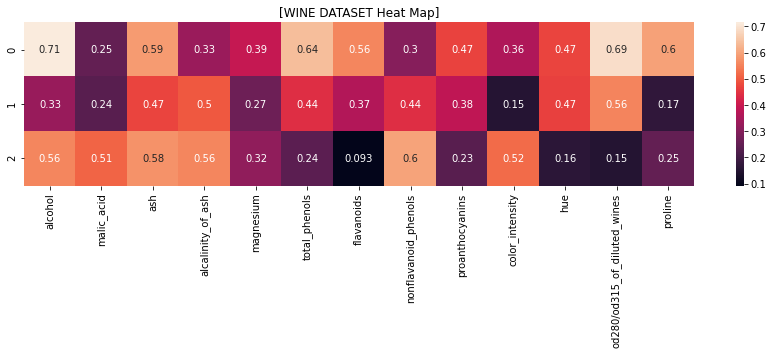

In [54]:
#Heat Map==================================
c_dataset = dataset.frame.copy()
c_dataset = (c_dataset - c_dataset.min()) / (c_dataset.max() - c_dataset.min())

h_dataset = c_dataset.groupby(["target"], as_index=False).mean()
h_dataset = h_dataset.loc[:, h_dataset.columns!="target"]

plt.figure(figsize=(15, 3))
plt.title("[WINE DATASET Heat Map]")
sns.heatmap(h_dataset, annot=True)
plt.show()
#End=======================================

#### 3.1.3 swarmplot를 통한 데이터 분포
***
+ 앞서 ash와 hue 데이터 간 평균이 동일하였다. ash의 경우 feature가 각 클래스 분류가 어려운 것을 확인할 수 있으며, hue의 경우 class_0과 class_1의 분포가 섞여있어 분류가 어려운 것을 확인 할 수 있다.
***

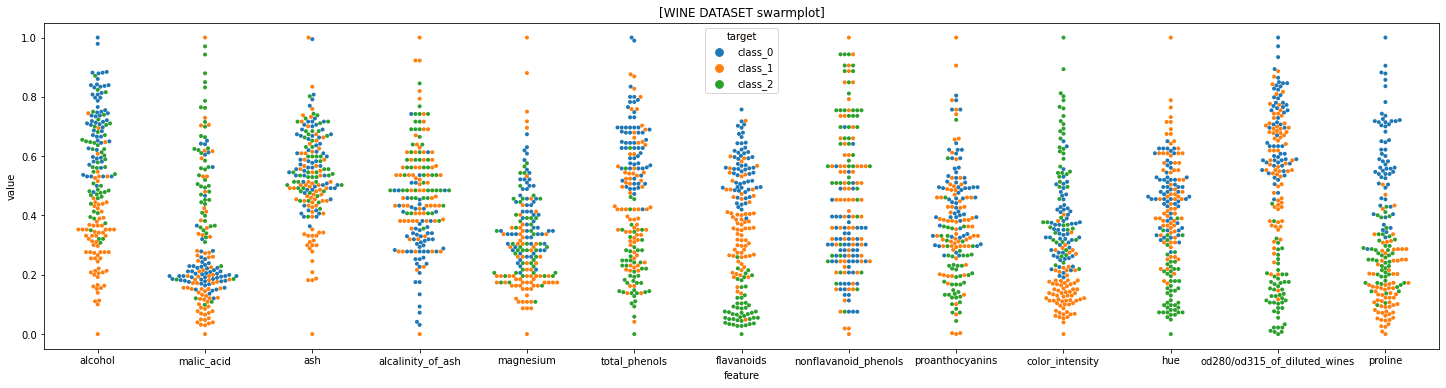

In [57]:
#swarm=====================================
new = pd.DataFrame({"value":[], "feature": [], "target": []})

for col in dataset.feature_names:
    r_new = c_dataset[[col, "target"]]
    r_new.columns = ["value", "target"]
    r_new = r_new.assign(feature=col)
    new = new.append(r_new)
    
new.loc[new.target == 1., "target"] = "class_2"
new.loc[new.target == 0.5, "target"] = "class_1"
new.loc[new.target == 0., "target"] = "class_0"

plt.figure(figsize=(25, 6))
plt.title("[WINE DATASET swarmplot]")
sns.swarmplot(data=new, x="feature", y="value", hue="target", s=4.)
plt.show()
#End=======================================

#### 3.1.4 데이터 히스토그램
***
+ '0'의 경우 59개, '1'의 경우 71개, '2'의 경우 48개로 균등하지 않음을 알 수 있다.
***

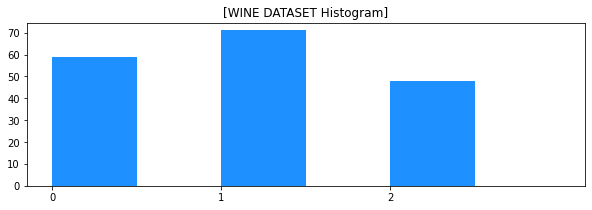

In [9]:
#target 데이터 수에 대한 히스토그램===================
plt.figure(figsize=(10, 3))
plt.title("[WINE DATASET Histogram]")
plt.xticks(range(0, 3))
plt.hist(dataset.target, range(0, 4), color="#1e90ff", width=0.5)
plt.show()
#End==================================================

#### 3. 2 데이터 정규화
***
+ 모델 학습 이전, 데이터를 정규화하여 학습 효율을 높이고자 한다. Min-Max 정규화를 이용한다.
***

In [13]:
dataset.data = (dataset.data - dataset.data.min()) / (dataset.data.max() - dataset.data.min())

print("Data_Info", "*" * 60)
print("max data: ", dataset.data.max())
print("\nmin data: ", dataset.data.min())
print("End_Info", "*" * 61)

Data_Info ************************************************************
max data:  alcohol                         1.0
malic_acid                      1.0
ash                             1.0
alcalinity_of_ash               1.0
magnesium                       1.0
total_phenols                   1.0
flavanoids                      1.0
nonflavanoid_phenols            1.0
proanthocyanins                 1.0
color_intensity                 1.0
hue                             1.0
od280/od315_of_diluted_wines    1.0
proline                         1.0
dtype: float64
min data:  alcohol                         0.0
malic_acid                      0.0
ash                             0.0
alcalinity_of_ash               0.0
magnesium                       0.0
total_phenols                   0.0
flavanoids                      0.0
nonflavanoid_phenols            0.0
proanthocyanins                 0.0
color_intensity                 0.0
hue                             0.0
od280/od315_of_diluted_wines

#### 3.3 모델별 학습 및 예측

In [14]:
uni_model = UniModel(dataset)   #인스턴스 생성, 초기화

#### 3.3.1 의사결정트리(Decision Tree Classifier)

In [15]:
y_test, y_pred = uni_model.get_model_predict("DTC")
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.89      1.00      0.94        17
           2       1.00      0.83      0.91        12

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36



#### 3.3.2 랜덤포레스트(Random Forest Classifier)

In [16]:
y_test, y_pred = uni_model.get_model_predict("RFC")
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



#### 3.3.3 서포트 벡터 머신(Support Vector Machine, SVM)

In [17]:
y_test, y_pred = uni_model.get_model_predict("SVM")
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



#### 3.3.4 확률적 경사 하강법(Stochastic Gradient Descent, SGD)

In [18]:
y_test, y_pred = uni_model.get_model_predict("SGD")
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.94      1.00      0.97        17
           2       1.00      0.92      0.96        12

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36



#### 3.3.5 로지스틱 회귀(Logistic Regression)

In [19]:
y_test, y_pred = uni_model.get_model_predict("LG")
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



#### 3.4 평가지표 선택
***
<span style="font-size:12pt; line-height:1.6; font-family:Serif;">
    &nbsp; &nbsp; 본 데이터셋에서는 각 모델을 평가하기 위해 <b>Accuracy</b>와 <b>f1-score</b>를 평가지표로 삼는다. Accuracy를 평가지표로 채택한 이유는, 클래스 별 중요도가 동일하기 때문이다. 동시에 f1-score를 채택한 이유는 각 클래스 별 데이터 분포가 상이하기 때문이다. f1-score란, F값으로 적합률(Precision)과 재현율(Precision)의 조화 평균에 해당한다. 그렇기에 F값은 레이블 간 데이터 개수에 차이가 존재할 때 이용한다[1]. 따라서 이러한 근거를 바탕으로 Accuracy와 f1-score를 모델의 평가지표로 채택하였다.
</span><br><br>

<span style="font-size:12pt; line-height:1.6; font-family:Serif;">
    &nbsp; &nbsp; Accuracy와 f1-score를 평가지표로 삼았을 때, 성능이 가장 좋은 모델은 '랜덤 포레스트', '서포트 벡터 머신', '로지스틱 회귀'이다. 모델의 Accuracy와 f1-score모두 1.0으로 100%의 정확도와 F값으로 좋은 성능을 보여준다.
</span><br><br>


***

### 4. 유방암 진단

#### 4.1 데이터셋 특성 파악
***
<span style="font-size:12pt; line-height:1.6; font-family:Serif;">
    &nbsp; &nbsp; 데이터는 총 569개로 feature의 개수는 30개이다. mean radious, worst fractal dimension 등의 독립변수로 이루어져 있다. 정답 클래스는 'benign(양성)', 'malignant(악성)'로 두 개이다. feature 별로 다른 항목을 다루고 있기 때문에, 데이터의값의 범위와 분포 등의 특징이 매우 다양하다. [BREAST_CANCER DATASET Heat Map]은 데이터의 featrue를 클래스(benign, malignant), 즉 유방암에대한 양성 및 음성 클래스를 평균 낸 것을 heatmap으로 시각화 한 것이다. 이를통해 정답 별로 featrue의 형태를 짐작할 수 있으며, 중요한 변수가 무엇인지 판단할 수 있다. [BREAST_CANCER DATASET swarmplot]는 본 데이터셋의 feature의 표준편차를 시각화 한 것이다.
</span><br><br>

<span style="font-size:12pt; line-height:1.6; font-family:Serif;">
    &nbsp; &nbsp; 정답 클래스에 따른 학습 데이터의 분포를 알아보는 것 또한 중요하다. [BREAST_CANCER DATASET Histogram]은 target 별 학습 데이터의 분포를 보여준다. 'benign'이 212개, 'malignant'은 357개로 데이터 분포에 약 1.7배 차이가 있다. 또한, 클래스의 중요도가 다른 것을 알 필요가 있다. '음성'을 올바르게 판단해야한다. 특히, 양성을 음성으로 판단하는 것보다 음성을 양성으로 판단하는 것에 대해 각별히 신경 쓸 필요가 있다.
</span><br><br>

***

#### 4.1.1 데이터셋 기본 정보

In [66]:
#3. 유방암 진단
dataset = load_breast_cancer(as_frame=True)

# #Data_info===========================================
print("Data_Info", "=" * 60)
print("dataset shape: ", dataset.data.shape)
print("feature: ", dataset.feature_names[0:3], "...", dataset.feature_names[-3:]) #feature에 대한 정보
print("target: ", np.unique(dataset.target_names))

print("\ndata_max", "*" * 40)
print("max data: ", dataset.data.max())
print("End_max", "*" * 41)

print("\ndata_min", "*" * 40)
print("min data: ", dataset.data.min())
print("End_max", "*" * 41)

print("\ndata_avg", "*" * 40)
print("avg: ", dataset.data.mean())
print("End_avg", "*" * 41)
print("End_Info", "=" * 61)
# #End==================================================

Data_Info ============================================================
dataset shape:  (569, 30)
feature:  ['mean radius' 'mean texture' 'mean perimeter'] ... ['worst concave points' 'worst symmetry' 'worst fractal dimension']
target:  ['benign' 'malignant']

data_max ****************************************
max data:  mean radius                  28.11000
mean texture                 39.28000
mean perimeter              188.50000
mean area                  2501.00000
mean smoothness               0.16340
mean compactness              0.34540
mean concavity                0.42680
mean concave points           0.20120
mean symmetry                 0.30400
mean fractal dimension        0.09744
radius error                  2.87300
texture error                 4.88500
perimeter error              21.98000
area error                  542.20000
smoothness error              0.03113
compactness error             0.13540
concavity error               0.39600
concave points error          0.0

#### 4.1.2 Target별 평균 히트맵
***
+ 유방암의 양성과 음성 데이터의 평균을 heatmap으로 시각화 한 것이다.
+ texture error, smoothness error, symmetry error는 두 클래스 간의 평균 차이가 작다.
***

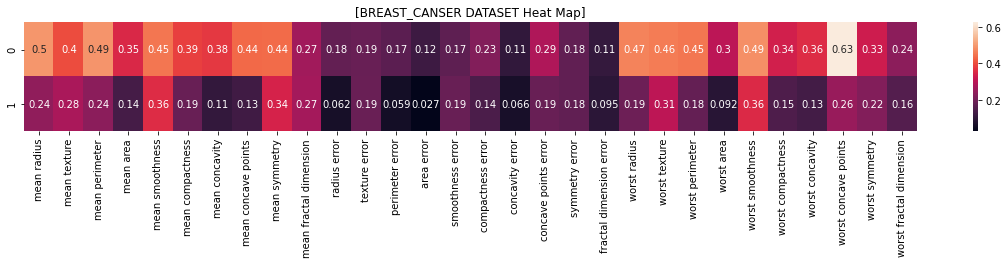

In [67]:
#Heat Map==================================
c_dataset = dataset.frame.copy()
c_dataset = (c_dataset - c_dataset.min()) / (c_dataset.max() - c_dataset.min())

h_dataset = c_dataset.groupby(["target"], as_index=False).mean()
h_dataset = h_dataset.loc[:, h_dataset.columns!="target"]

plt.figure(figsize=(20, 2))
plt.title("[BREAST_CANSER DATASET Heat Map]")
sns.heatmap(h_dataset, annot=True)
plt.show()
#End=======================================

#### 4.1.3 swarmplot를 통한 데이터 분포
***
+ 앞서 texture error, smoothness error, symmetry error의 평균값의 차이가 크지 않음을 알 수 있었다. 데이터의 분포를 통해, 해당 feature에 대해 분류하는 것이 어려움을 알 수 있다.
***

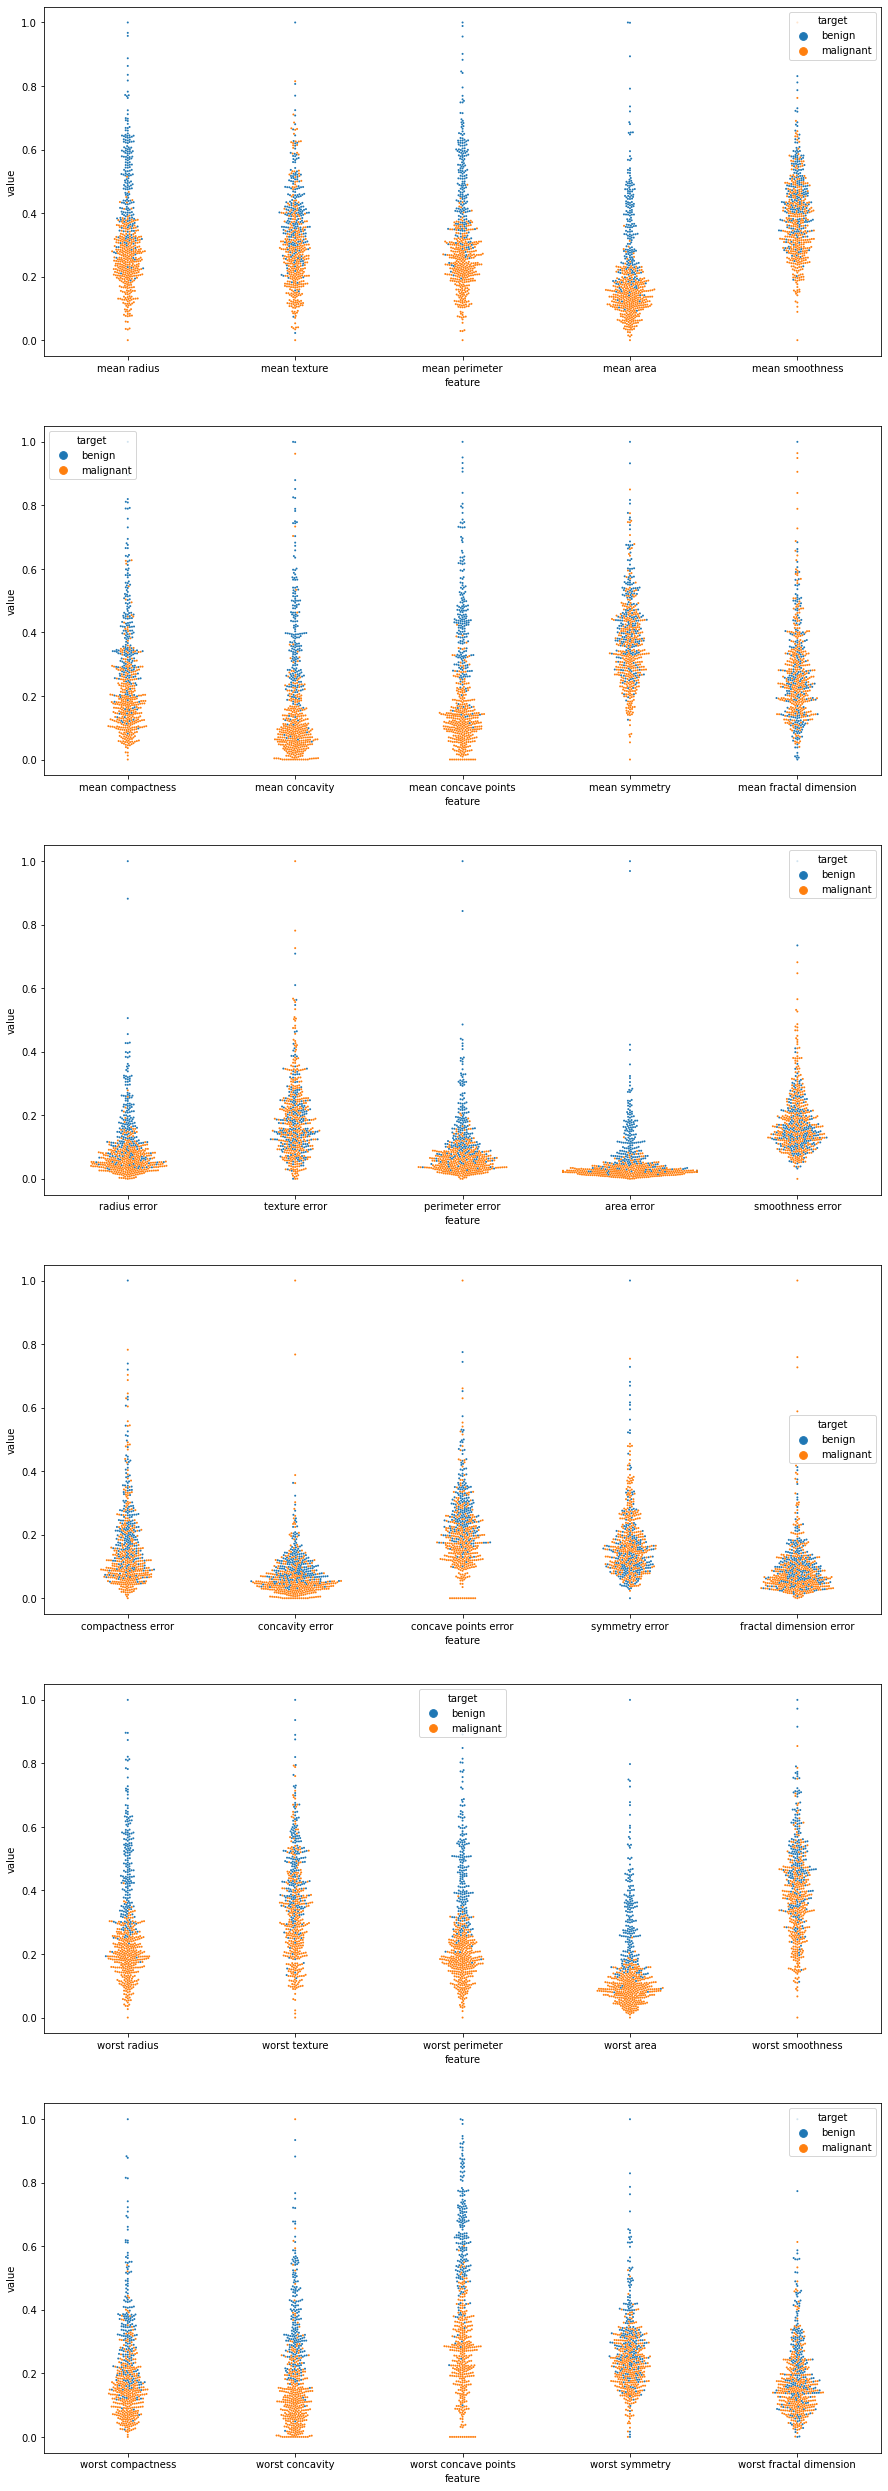

In [68]:
#swarm=====================================
new = pd.DataFrame({"value":[], "feature": [], "target": []})

for col in dataset.feature_names:
    r_new = c_dataset[[col, "target"]]
    r_new.columns = ["value", "target"]
    r_new = r_new.assign(feature=col)
    new = new.append(r_new)

new.loc[new.target == 0, "target"] = "benign"   #양성
new.loc[new.target == 1, "target"] = "malignant"   #악성
# print(new.loc[new.target == "benign", ])
fig = plt.figure(figsize=(15, 45))
for i in range(int(len(dataset.feature_names)/5)):
    fig.add_subplot(6, 1, i + 1)
    i_end = 5 * i + 5
    i *= 5
    lit = dataset.feature_names[i:i_end]
    veve = new[new["feature"].isin(lit)]
    sns.swarmplot(data=veve, x="feature", y="value", hue="target", s=2.)
plt.show()
#End=======================================

#### 4.1.4 데이터 히스토그램
***
+ 음성 212개, 양성 357개임을 확인할 수 있다. 데이터 간 분포가 균일하지 않기 때문에 이후 평가지표 선택에 있어 accuracy가 아닌 다른 지표를 고려할 필요가 있다.
***

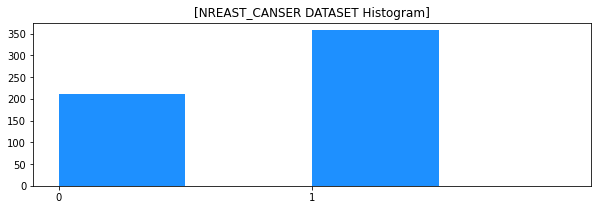

In [69]:
#target 데이터 수에 대한 히스토그램=====================
plt.figure(figsize=(10, 3))
plt.title("[NREAST_CANSER DATASET Histogram]")
plt.xticks(range(0, 2))
plt.hist(dataset.target, range(0, 3), color="#1e90ff", width=0.5)
plt.show()
#End====================================================

#### 4. 2 데이터 정규화
***
+ 모델 학습 이전, 데이터를 정규화하여 학습 효율을 높이고자 한다. Min-Max 정규화를 이용한다.
***

In [70]:
dataset.data = (dataset.data - dataset.data.min()) / (dataset.data.max() - dataset.data.min())

print("Data_Info", "*" * 60)
print("max data: ", dataset.data.max())
print("min data: ", dataset.data.min())
print("End_Info", "*" * 61)

Data_Info ************************************************************
max data:  mean radius                1.0
mean texture               1.0
mean perimeter             1.0
mean area                  1.0
mean smoothness            1.0
mean compactness           1.0
mean concavity             1.0
mean concave points        1.0
mean symmetry              1.0
mean fractal dimension     1.0
radius error               1.0
texture error              1.0
perimeter error            1.0
area error                 1.0
smoothness error           1.0
compactness error          1.0
concavity error            1.0
concave points error       1.0
symmetry error             1.0
fractal dimension error    1.0
worst radius               1.0
worst texture              1.0
worst perimeter            1.0
worst area                 1.0
worst smoothness           1.0
worst compactness          1.0
worst concavity            1.0
worst concave points       1.0
worst symmetry             1.0
worst fractal dimen

#### 4.3 모델별 학습 및 예측

In [71]:
uni_model = UniModel(dataset)   #인스턴스 생성, 초기화

#### 4.3.1 의사결정트리(Decision Tree Classifier)

In [72]:
y_test, y_pred = uni_model.get_model_predict("DTC")
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.91      0.96      0.93        74

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114



#### 4.3.2 랜덤포레스트(Random Forest Classifier)

In [73]:
y_test, y_pred = uni_model.get_model_predict("RFC")
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        74

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



#### 4.3.3 서포트 벡터 머신(Support Vector Machine, SVM)

In [74]:
y_test, y_pred = uni_model.get_model_predict("SVM")
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        40
           1       0.97      1.00      0.99        74

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114



#### 4.3.4 확률적 경사 하강법(Stochastic Gradient Descent, SGD)

In [75]:
y_test, y_pred = uni_model.get_model_predict("SGD")
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.99      0.99      0.99        74

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



#### 4.3.5 로지스틱 회귀(Logistic Regression)

In [76]:
y_test, y_pred = uni_model.get_model_predict("LG")
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93        40
           1       0.94      1.00      0.97        74

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



#### 4.4 혼동 행렬
***
<span style="font-size:12pt; line-height:1.6; font-family:Serif;">
    &nbsp; &nbsp; 로지스틱 회귀의 결과 값을 바탕으로 혼동 행렬을 해석하고자 한다. FN는 5로 이는 실제 '양성'을 '악성'으로 판단한 것이다. FP는 0으로 이는 실제 '악성'을 '양성'으로 판단한 것이다. 본 분석에서 중요하게 봐야 할 것은 FP이다. 실제 유방암 임에도 불구하고 그렇지 않다고 판단하는 것에 해당하기 때문이다. [표 1]은 유방암 진단 데이터에 대한 로지스틱 회귀 모델의 혼동 행렬을 보여준다.
</span><br><br>

||**Predict True**|**Predict False**|
|:--------:|:--------:|:--------:|
|**Real True**|35|5|
|**Real False**|0|74|

<br><div style="text-align: center;">[표 1] 유방암 진단 데이터에 대한 로지스틱 회귀 모델의 혼동 행렬</div>


***

In [89]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[35  5]
 [ 0 74]]


#### 4.4 평가지표 선택
***
<span style="font-size:12pt; line-height:1.6; font-family:Serif;">
    &nbsp; &nbsp; 본 데이터셋에서는 각 모델을 평가하기 위해 <b>Precision</b>을 평가지표로 삼는다. 본 모델에서 중요하게 보아야 할 것은 '악성이지만 양성으로 판단한 경우'이다. 그러므로 양성이라 판단 한 것 중에 '악성'이 있었는지를 판단하는 지표를 채택해야 한다. Precision(적합률)은 '양성'으로 예측 했을 때 실제로 '양성'인 비율을 의미한다.  따라서 이러한 근거를 바탕으로 Precision을 모델의 평가지표로 채택하였다.
</span><br><br>

<span style="font-size:12pt; line-height:1.6; font-family:Serif;">
    &nbsp; &nbsp; Precision을 평가지표로 삼았을 때, 성능이 가장 좋은 모델은 '랜덤 포레스트'이다. 해당 모델의 Precision은 1.0으로 좋은 성능을 보여주는 것으로 이해할 수 있다.
</span>

***

### 5. 결론
***
<span style="font-size:12pt; line-height:1.6; font-family:Serif;">
    &nbsp; &nbsp; scikit-learn 머신러닝 라이브러리에서 제공되는 '숫자 이미지 분류', '와인 등급 분류', '유방암 진단' 데이터셋을 중심으로 데이터의 분석, 학습, 모델평가를 실시하였다. 또한, scikit-learn 툴에서 지원해주는 '의사결정트리', '랜덤포레스트', 'SVM', 'SGD', '로지스틱 회귀' 알고리즘 모델을 사용하여 그 결과를 비교하였다. [표 2]는 각 데이터셋의 평가지표와 점수 그리고 높은 점수를 보여준 모델을 제시한 것이다.
</span><br><br>


|Dataset|평가지표|score|모델|
|:--------:|:--------:|:--------:|:--------:|
|**Digits**|Accuracy|0.96|SVM|
|**Wine**|Accuracy & f1-score|1.0 & 1.0|Random Forest, SVM, Logistic Regression|
|**Breas Cancer**|Precision|1.0|Random Forest|

<br>
<div style="text-align: center;">[표 2] 각 데이터셋의 평가지표 및 점수</div>

***

#### 참고문헌
***
[1] 주식회사시스템계획연구소, 『머신러닝 부트캠프 with 파이썬』, 길벗(2018), 64-66
***

#### 형상관리 기록
***
+ ex2_v2
    + v2_1: 초기 버전
    + v2_2: 마크다운 및 내용 보강


+ ex2_v3
    + v3_1: 오타 수정 및 내용 보강
    
***

##### 회고
***
<span style="font-size:11pt; line-height:1.8;">
    &nbsp; &nbsp; 이번 기회를 통해 scikit-learn을 처음 사용하였다. scikit-learn 툴의 가장 큰 장점은 모델을 직접 설계할 필요가 없다는 것이다. R에도 비슷한 머신러닝 툴이 존재하는데 H2O가 그에 해당한다. 해당 툴 또한 사용자가 직접 모델을 설계하지 않고 학습데이터만 넣어주면 그 결과가 바로 제시 된다. 이러한 툴은 데이터를 간단하게 학습시키고 그 결과를 예측하고 싶을 때 유용하게 이용할 수 있을 것으로 기대된다.
</span><br><br>

<span style="font-size:11pt; line-height:1.8;">
    &nbsp; &nbsp; 혼동행렬과 각 평가지표는 항상 헷갈리기 때문에 그 개념을 쉽게 잊게된다. precision은 양성으로 예측 한 것이 실제 양성인 비율, recall은 실제 양성 중, 양성으로 예측한 비율, f1-socre는 통계학에서 사용하는 Fvalue로 조화평균에 해당하여 데이터의 분포를 고려한 score로 이해할 수 있다.
</span><br><br>

<span style="font-size:11pt; line-height:1.8;">
    &nbsp; &nbsp; 모델 학습 이전에 데이터의 특성을 파악하는 것에 대한 중요성을 알 수 있었다. 특히, 히트맵, swarmplot, histogram 등의 데이터를 시각화하여 보다 데이터를 쉽게 이해하는 것이 가능하였다.
</span><br><br>

***